## Image Classification with a Neural Network

### What do we want to do today?
We want to learn how a simple Feed Forward Backpropagation Neural Network works.

### How are we going to do this?
With the use case of simple image classification using the MNIST Dataset

## Let's get started!

### MNIST Dataset
* 10.000 pictures of digits from 0-9
* 10.000 corresponding numbers from 0-9

* Neural Network read in pictures and output a prediction
* y_pred = f(X) -> difference y_pred and y as small as possible

* how does the NN read in images?
* how does the NN calculate the output?
* how does the NN learn?

## Importing Stuff

In [1]:
import numpy as np #lineare Algebra
import matplotlib.pyplot as plt # plotting stuff
import math # exp functions und so 
import random # initialization of neural network

# custom modules for explanations
import sys
sys.path.append("/Users/paulsemmelrock/git/NeuralNet/neural_net_tutorial")
from draw_network import neural_net_explanation
from draw_network import draw_network
from data import read_data

### Read in the Dataset

In [2]:
X_full, y_full = read_data.import_data()
print(f"Shape of X: {X_full.shape}")
print(f"Shape of y: {y_full.shape}")

Shape of X: (10000, 784)
Shape of y: (10000,)


- X: 10.000 vectors with 784 dimensions -> 28x28 pixels = 784
- y: 10.000 scalars

The corresponding digit to the image is: 2


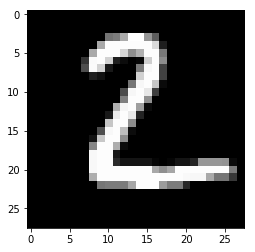

In [3]:
sample=1
plt.imshow(X_full[sample].reshape(28,28), cmap="gray")
print(f"The corresponding digit to the image is: {y_full[sample]}")

### Let's talk about Neural Networks

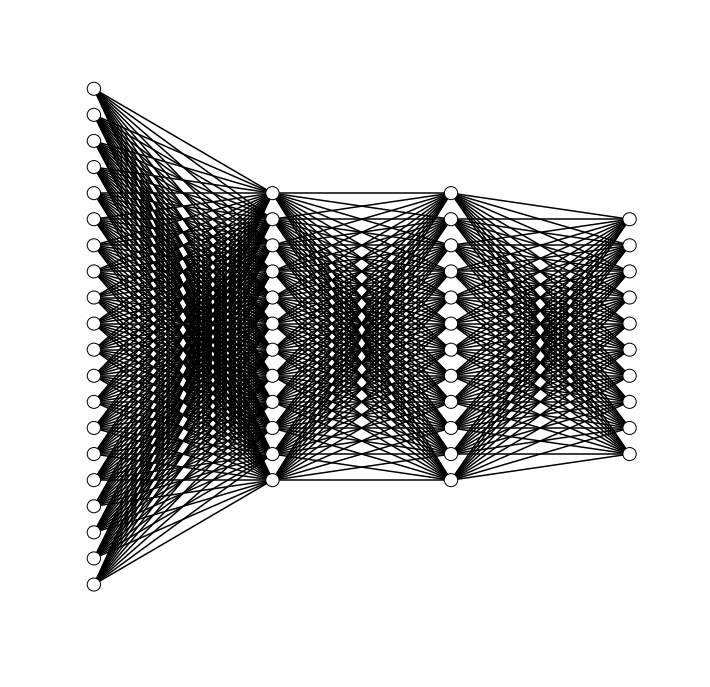

In [4]:
draw_network.draw_network([20,12,12,10])

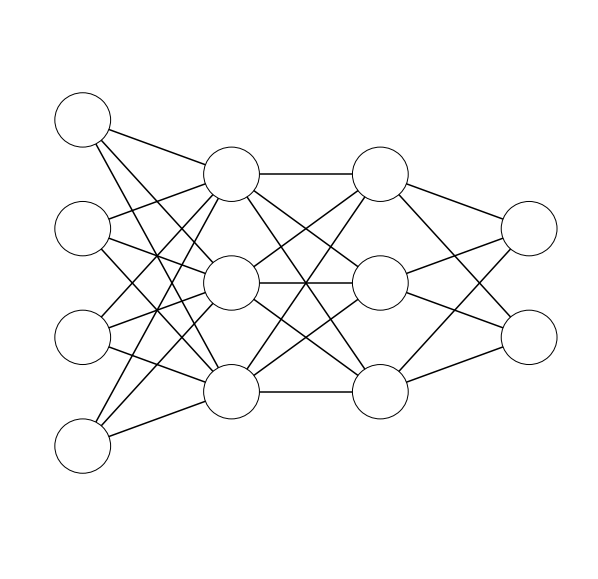

In [5]:
neural_net_explanation.neural_net_explanation(0)

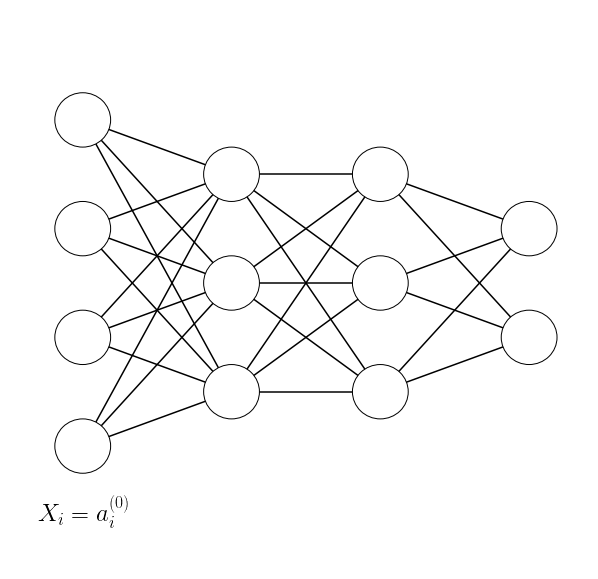

In [6]:
neural_net_explanation.neural_net_explanation(1)

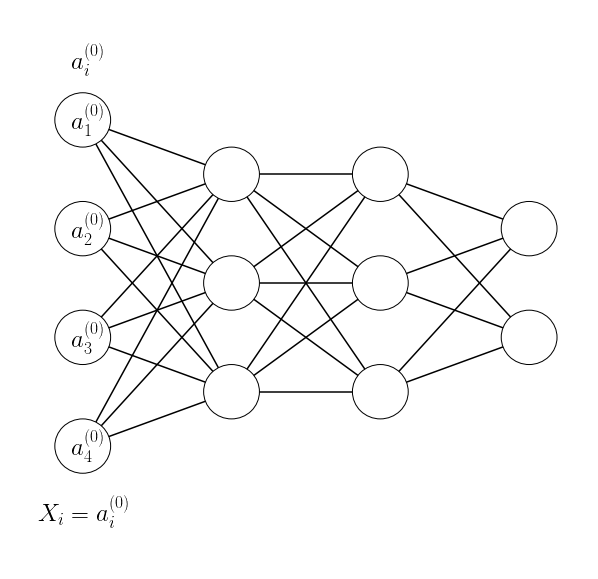

In [7]:
neural_net_explanation.neural_net_explanation(2)

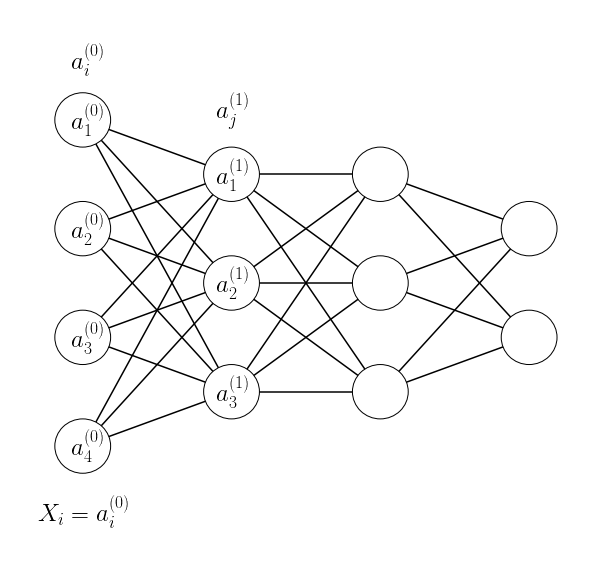

In [8]:
neural_net_explanation.neural_net_explanation(3)

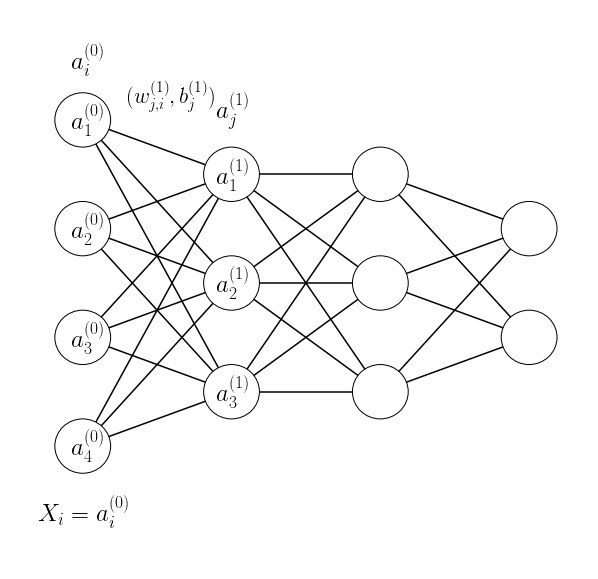

In [9]:
neural_net_explanation.neural_net_explanation(4)

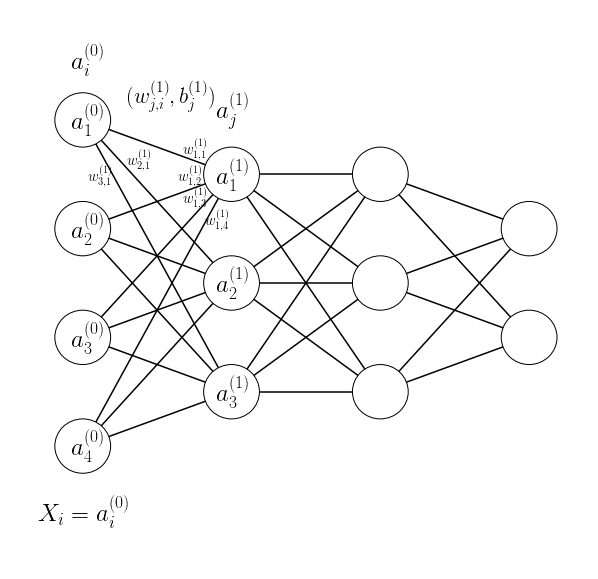

In [10]:
neural_net_explanation.neural_net_explanation(5)

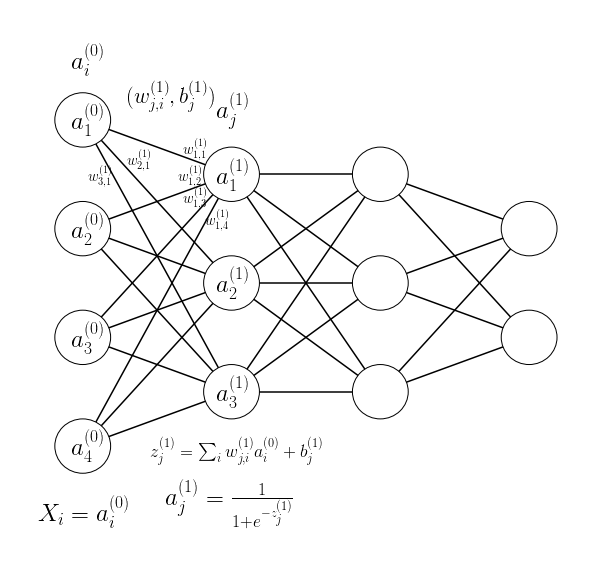

In [11]:
neural_net_explanation.neural_net_explanation(6)

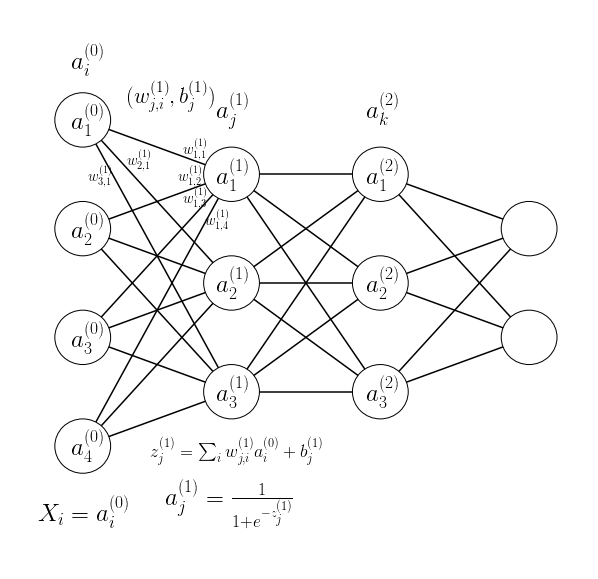

In [12]:
neural_net_explanation.neural_net_explanation(7)

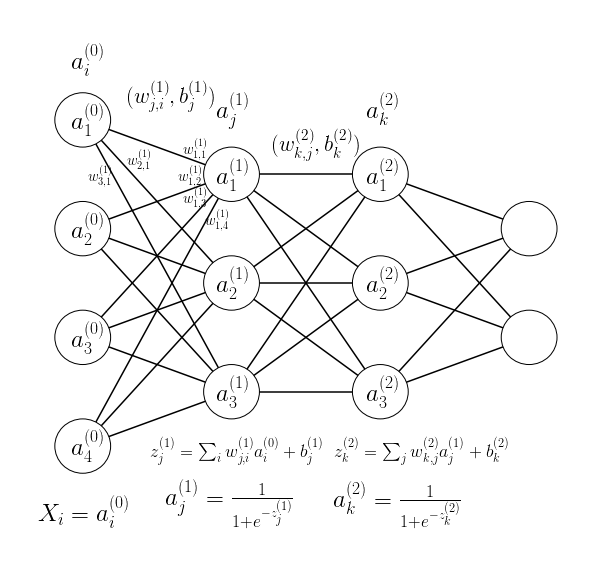

In [13]:
neural_net_explanation.neural_net_explanation(8)

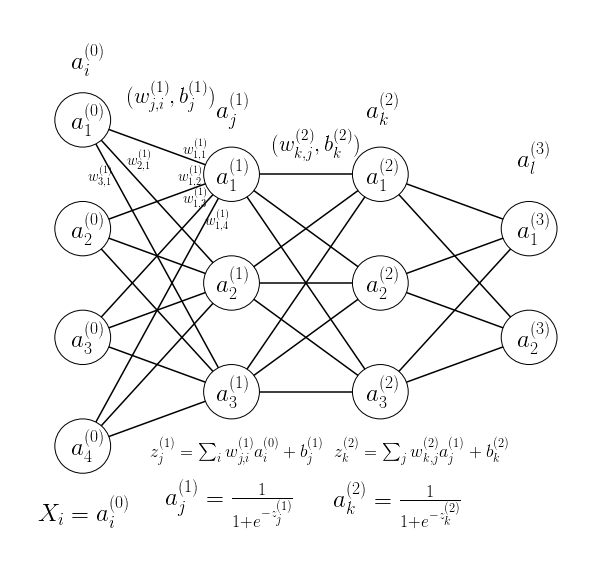

In [14]:
neural_net_explanation.neural_net_explanation(9)

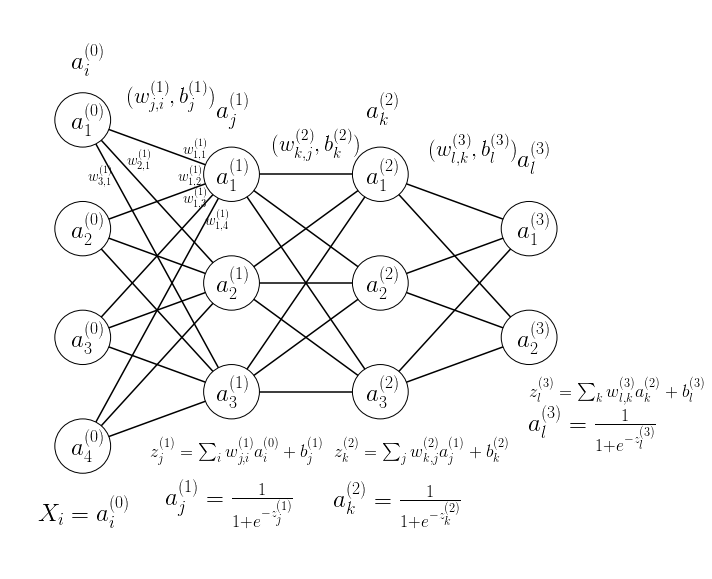

In [15]:
neural_net_explanation.neural_net_explanation(10)

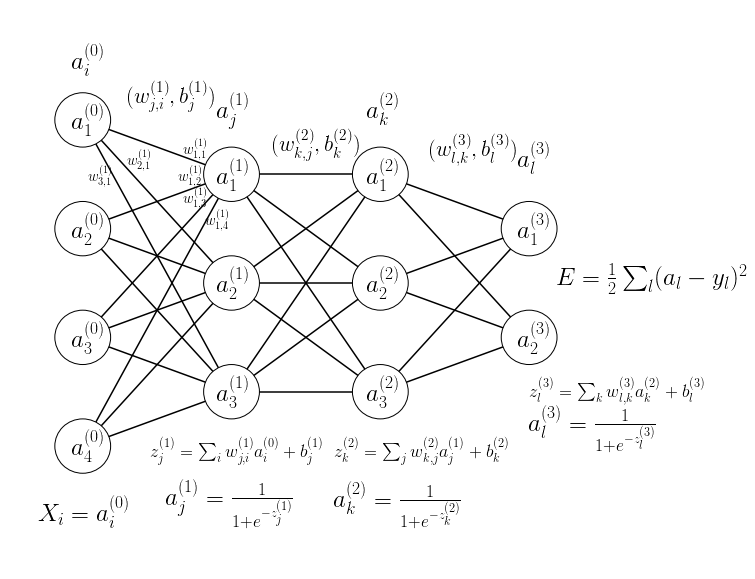

In [16]:
neural_net_explanation.neural_net_explanation(11)

## Getting ready 

### "Reshape" y into a vector for easier comparison with the NN output

In [17]:
def reshape_y(y_scalar):
    y_vector = np.zeros([10000, 10])
    for i in range(y_vector.shape[0]):
        y_vector[i][y_scalar[i]] = 1
    return y_vector

In [18]:
y_full = reshape_y(y_full)

### Define Train/Test Split

In [21]:
X_train = X_full[:7000][:]/255
y_train = y_full[:7000]

X_test = X_full[7000:][:]/255
y_test = y_full[7000:]

In [24]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (7000, 784)
X_test: (3000, 784)
y_train: (7000, 10)
y_test: (3000, 10)


## Set up the Neural Network

In [25]:
nr_neurons = np.array([X_full.shape[1],20,20,10])
nr_neurons

array([784,  20,  20,  10])

In [26]:
# Initializing weights randomly
def init_weights(nr_neurons):
    weights = []
    biases = []
    for l in range(len(nr_neurons)-1):
        weight = np.random.normal(size=[nr_neurons[l+1],nr_neurons[l]])
        bias = np.random.normal(size=[nr_neurons[l+1]])
        weights.append(weight)
        biases.append(bias)
    return weights, biases

In [27]:
weights, biases = init_weights(nr_neurons)

In [29]:
def calc_act(w, a_old, b):
    z = np.dot(w,a_old)+b
    a_new = sigmoid(z)
    return a_new, z

def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

In [34]:
# Calculate the activations for every layer
def act_layers(X, weights, biases, sample=0):
    a_layer = [X[sample]]
    z_layer = []
    for i in range(len(nr_neurons)-1):
        a, z = calc_act(weights[i], a_layer[i], biases[i])
        a_layer.append(a)
        z_layer.append(z)
    return a_layer, z_layer

In [35]:
a_layer, z_layer = act_layers(X_train, weights, biases, sample=0)

In [36]:
# Define mean squared error cost function
def cost_function(a_layer, y, sample=0):
    cost = 0.5*sum((a_layer[-1]-y[sample])**2)
    return cost

In [37]:
cost_function(a_layer, y_train, sample=0)

2.9480577218518107

In [45]:
def calc_mean_cost(X, y, weights, biases):
    cost_list = []
    for i in range(X.shape[0]):
        a, z = act_layers(X, weights, biases, sample=i)
        cost = cost_function(a, y, sample=i)
        cost_list.append(cost)
    mean_cost = sum(cost_list)/len(cost_list)
    return mean_cost

In [46]:
calc_mean_cost(X_train, y_train, weights, biases)

1.5056608456671814

### Out of curiousity: how many digits do we predict correctly with random weights?

In [313]:
def correctly_classified(X, y):
    k=0
    for j in range(X.shape[0]):
        if np.argmax(act_layers(X, weights, biases, sample=j)[0][-1])==np.argmax(y[j]):
            k=k+1
    return k

In [43]:
print(f"Number of correctly classified samples: {correctly_classified(X_train, y_train)} out of {X_train.shape[0]}")

Number of correctly classified samples: 695 out of 7000


# Backpropagation

- Cost function is a function of all weights and biases
- Gradient of a function shows direction of steepest slope for every point
- Neg. gradient of error function with respect to all weights and biases shows steepest descent

$$\frac{\partial E}{\partial w_{i,j}} , \frac{\partial E}{\partial b_{j}}$$

# Gradient Cost/Error Function
## Gradient with respect to the n layer weights

$$\frac{\partial E}{\partial w^n_{i,j}} = \sum_{k,l} \frac{\partial{E}}{\partial a^n_k} \frac{\partial{a^n_k}}{\partial z^n_l} \frac{\partial{z^n_l}}{\partial w^n_{i,j}}$$

$$E=\sum_p \frac{1}{2} (a^n_p-y_p)^2$$

$$\frac{\partial{E}}{\partial a^n_k} = \sum_p \frac{1}{2} \frac{\partial}{\partial a^n_k} (y_p-a^n_p)^2 = $$
$$ = \sum_p \delta_{p,k} (a^n_p-y_p) = a^n_k-y_k$$

$$ a^n_k=\sigma(z^n_k) = \frac{1}{1+e^{-z^n_k}} $$

$$\frac{\partial a^n_k}{\partial z^n_l} = \frac{\partial}{\partial z^n_l} \frac{1}{1+e^{-z^n_k}}$$
$$ \frac{\partial}{\partial z^n_l} (1+e^{z^n_k})^{-1} = - \delta_{k,l} \;(1+e^{-z^n_k})^{-2} \;  \; e^{-z^n_k} \; (-1) =$$
$$ = \delta_{k,l}\;\frac{e^{-z^n_k}}{(1+e^{-z^n_k})^{-2}} = \delta_{k,l}\;\frac{e^{-z^n_k}}{(1+e^{-z^n_k})}  \frac{1}{(1+e^{-z^n_k})} = $$
$$ = \delta_{k,l}\;\frac{1}{1+e^{-z^n_k}}  \frac{(1+e^{-z^n_k})-1}{1+e^{-z^n_k}} = $$
$$ = \delta_{k,l}\;\frac{1}{1+e^{-z^n_k}} \left( \frac{1+e^{-z^n_k}}{1+e^{-z^n_k}}-\frac{1}{1+e^{-z^n_k}} \right)$$
$$ = \delta_{k,l}\;\frac{1}{1+e^{-z^n_k}} \left( 1-\frac{1}{1+e^{-z^n_k}} \right) =$$
$$ = \delta_{k,l}\;\sigma(z^n_k) \left( 1-\sigma(z^n_k) \right) $$

$$ z^n_l = \sum_m w^n_{l,m}a^{n-1}_m+b^n_l $$

$$ \frac{\partial z^n_l}{\partial w^n_{i,j}} =\sum_m \frac{\partial}{\partial w^n_{i,j}} w^n_{l,m}a^{n-1}_m+b^n_l =$$
$$ \sum_m \delta_{i,l} \delta_{j,m} a^{n-1}_m = \delta_{i,l} a^{n-1}_j$$

$$\frac{\partial E}{\partial w^n_{i,j}} = \sum_{k,l} \frac{\partial{E}}{\partial a^n_k} \frac{\partial{a^n_k}}{\partial z^n_l} \frac{\partial{z^n_l}}{\partial w^n_{i,j}} = $$
$$ =\sum_{k,l} (a^n_k-y_k) \delta_{k,l}\;\sigma(z^n_k) \left( 1-\sigma(z^n_k) \right) \delta_{i,l} a^{n-1}_j $$
$$ = \underbrace{(a^n_i-y_i) \; \sigma(z^n_i) \; \left( 1-\sigma(z^n_i) \right)}_{\delta^n_i} \; a^{n-1}_j =$$
$$ = \delta^n_i \; a^{n-1}_j $$

$$\frac{\partial E}{\partial b^n_{i}} = \frac{\partial{E}}{\partial a^n_k} \frac{\partial{a^n_k}}{\partial z^n_l} \frac{\partial{z^n_l}}{\partial b^n_{i}} = \delta^n_i $$

## Gradient with respect to the n-1 layer weights

$$\frac{\partial E}{\partial w^{n-1}_{i,j}} = \sum_{k,l,m,n} \frac{\partial{E}}{\partial a^{n}_k} \frac{\partial{a^{n}_k}}{\partial z^{n}_l} \frac{\partial z^{n}_l}{\partial a^{n-1}_m} \frac{\partial a^{n-1}_m}{\partial z^{n-1}_n} \frac{\partial{z^{n-1}_n}}{\partial w^{n-1}_{i,j}} $$

$$\sum_{k} \frac{\partial{E}}{\partial a^{n}_k} \frac{\partial{a^{n}_k}}{\partial z^{n}_l} = \delta^n_l$$ 

$$\frac{\partial z^{n}_l}{\partial a^{n-1}_m} = \frac{\partial}{\partial a^{n-1}_m} \sum_p \partial w^n_{l,p}a^{n-1}_p+b^n_l =$$
$$ \sum_p w^n_{l,p} \delta_{p,m} = w^n_{l,m}$$

$$\frac{\partial a^{n-1}_m}{\partial z^{n-1}_n} = \delta_{m,n}\;\sigma(z^{n-1}_m) \left( 1-\sigma(z^{n-1}_m) \right)$$

$$ \frac{\partial z^{n-1}_n}{\partial w^{n-1}_{i,j}} =\sum_o \frac{\partial}{\partial w^{n-1}_{i,j}} w^{n-1}_{n,o}a^{n-2}_o+b^{n-1}_n =$$
$$ \sum_o \delta_{i,n} \delta_{j,o} a^{n-2}_o = \delta_{i,n} a^{n-2}_j$$

$$\frac{\partial E}{\partial w^{n-1}_{i,j}} = \sum_{m,n,l}\delta^n_l w^n_{l,m} \delta_{m,n}\;\sigma(z^{n-1}_m) \left( 1-\sigma(z^{n-1}_m) \right) \delta_{i,n} a^{n-2}_j =$$
$$ \underbrace{\sum_{l}\delta^n_l w^n_{l,i} \;\sigma(z^{n-1}_i) \left( 1-\sigma(z^{n-1}_i) \right)}_{\delta^{n-1}_i} a^{n-2}_j =$$
$$ = \delta^{n-1}_i \; a^{n-2}_j$$

all the other layers are calculated analogously 

## Back to Coding

In [49]:
def calc_grad(nr_neurons, X, y, weights, biases, sample=0):
    w_grad = []
    b_grad = []
    
    a, z = act_layers(X, weights, biases, sample=sample)
    for i in range(len(nr_neurons)-1):
        if i == 0:
            delta = (a[-i-1]-y[sample])*(1-a[-i-1])*a[-i-1]
            grad_w = np.outer(delta,a[-i-2])
            grad_b = delta
        else:
            delta = np.dot(weights[-i].T,delta)*(1-a[-i-1])*a[-i-1]
            grad_w = np.outer(delta,a[-i-2])
            grad_b = delta
        
        w_grad.insert(0,grad_w)
        b_grad.insert(0,grad_b)
    return w_grad, b_grad

In [50]:
w_grad, b_grad = calc_grad(nr_neurons, X_train, y_train, weights, biases, sample=0)

#### So far we calculated the gradient for one sample:
* we now know which changes have to be made to the weights in order to predict this one sample better
* however, we want a generalizable neural network
* therfore we average over all samples to find the best changes to the weights in order to make better predictions for all samples

In [51]:
def calc_mean_grad(nr_neurons, X, y, weights, biases):
    w_grad_list = []
    b_grad_list = []
    for i in range(X.shape[0]):
        w_grad, b_grad = calc_grad(nr_neurons, X, y, weights, biases, sample=i)
        w_grad_list.append(w_grad)
        b_grad_list.append(b_grad)

    w_grad_mean = []
    b_grad_mean = []
    for i in range(len(nr_neurons)-1):
        w_grad_mean.append(sum([w_grad_list[j][i] for j in range(X.shape[0])])/X.shape[0])
        b_grad_mean.append(sum([b_grad_list[j][i] for j in range(X.shape[0])])/X.shape[0])
    return w_grad_mean, b_grad_mean

### Update function for the weights and biases 

In [52]:
def update_weights_biases(weights, biases, w_grad_mean, b_grad_mean, nr_neurons):
    w = []
    b = []
    for i in range(len(nr_neurons)-1):
        w.append(weights[i]-w_grad_mean[i])
        b.append(biases[i]-b_grad_mean[i])
    return w, b

## We are ready to train the neural network

In [115]:
mean_c=[]
acc=[]
for i in range(5000):
    stepsize=1
    idx = random.sample(range(X_train.shape[0]), 200)
    w_grad_mean, b_grad_mean = calc_mean_grad(nr_neurons, X_train[idx,:], y_train[idx], weights, biases)
    w_grad_mean = [w*stepsize for w in w_grad_mean]
    b_grad_mean = [b*stepsize for b in b_grad_mean]
    weights, biases = update_weights_biases(weights, biases, w_grad_mean, b_grad_mean, nr_neurons)
    c = calc_mean_cost(X_train, y_train, weights, biases)
    mean_c.append(c)
    k=0
    for j in range(X_train.shape[0]):
        if np.argmax(act_layers(X_train, weights, biases, sample=j)[0][-1])==np.argmax(y_train[j]):
            k=k+1
    acc.append(k)
    if i%1000==0:
        print(i)
    #print(k)
    #print(c)
trained_weights_sigm = weights
trained_biases_sigm = biases 

0
1000
2000
3000
4000


Text(0.5, 0, 'correctly classified')

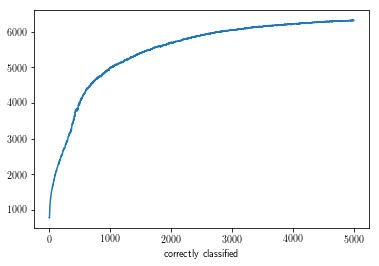

In [116]:
plt.plot(range(len(acc)),acc)
plt.xlabel("number of learning iterations")
plt.xlabel("correctly classified")

### Correctly Classified

In [117]:
k=0
for j in range(X_train.shape[0]):
    if np.argmax(act_layers(X_train, trained_weights_sigm, trained_biases_sigm, sample=j)[0][-1])==np.argmax(y_train[j]):
        k=k+1
print(f"correctly classified Train: {k/X_train.shape[0]}")
k=0
for j in range(X_test.shape[0]):
    if np.argmax(act_layers(X_test, trained_weights_sigm, trained_biases_sigm, sample=j)[0][-1])==np.argmax(y_test[j]):
        k=k+1
print(f"correctly classified Test: {k/X_test.shape[0]}")

correctly classified Train: 0.9027142857142857
correctly classified Test: 0.871


### Optimizing the Neural Network

In [114]:
weights, biases = init_weights(nr_neurons)

In [74]:
def calc_act_softmax(w, a_old, b):
    z = np.dot(w,a_old)+b
    a_new = softmax(z)
    return a_new, z

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [75]:
def act_layers_softmax(X, weights, biases, sample=0):
    a_layer = [X[sample]]
    z_layer = []
    for i in range(len(nr_neurons)-1):
        if i==len(nr_neurons)-2:
            a, z = calc_act_softmax(weights[i], a_layer[i], biases[i])
        else:
            a, z = calc_act(weights[i], a_layer[i], biases[i])
        a_layer.append(a)
        z_layer.append(z)
    return a_layer, z_layer

In [76]:
def calc_grad_softmax(nr_neurons, X, y, weights, biases, sample=0):
    w_grad = []
    b_grad = []
    
    a, z = act_layers(X, weights, biases, sample=sample)
    for i in range(len(nr_neurons)-1):
        if i == 0:
            delta = (a[-i-1]-y[sample])
            grad_w = np.outer(delta,a[-i-2])
            grad_b = delta
        else:
            delta = np.dot(weights[-i].T,delta)*(1-a[-i-1])*a[-i-1]
            grad_w = np.outer(delta,a[-i-2])
            grad_b = delta
        
        w_grad.insert(0,grad_w)
        b_grad.insert(0,grad_b)
    return w_grad, b_grad

In [77]:
def calc_mean_grad_softmax(nr_neurons, X, y, weights, biases):
    w_grad_list = []
    b_grad_list = []
    for i in range(X.shape[0]):
        w_grad, b_grad = calc_grad_softmax(nr_neurons, X, y, weights, biases, sample=i)
        w_grad_list.append(w_grad)
        b_grad_list.append(b_grad)

    w_grad_mean = []
    b_grad_mean = []
    for i in range(len(nr_neurons)-1):
        w_grad_mean.append(sum([w_grad_list[j][i] for j in range(X.shape[0])])/X.shape[0])
        b_grad_mean.append(sum([b_grad_list[j][i] for j in range(X.shape[0])])/X.shape[0])
    return w_grad_mean, b_grad_mean

In [108]:
mean_cost_soft=[]
acc_soft=[]
for i in range(5000):
    stepsize=1
    idx = random.sample(range(X_train.shape[0]), 200)
    w_grad_mean, b_grad_mean = calc_mean_grad_softmax(nr_neurons, X_train[idx,:], y_train[idx], weights, biases)
    w_grad_mean = [w*stepsize for w in w_grad_mean]
    b_grad_mean = [b*stepsize for b in b_grad_mean]
    weights, biases = update_weights_biases(weights, biases, w_grad_mean, b_grad_mean, nr_neurons)
    c = calc_mean_cost(X_train, y_train, weights, biases)
    mean_cost_soft.append(c)
    k=0
    for j in range(X_train.shape[0]):
        if np.argmax(act_layers_softmax(X_train, weights, biases, sample=j)[0][-1])==np.argmax(y_train[j]):
            k=k+1
    acc_soft.append(k)
    if i%1000==0:
        print(i)    
    #print(k)
    #print(c)
trained_weights_soft = weights
trained_biases_soft = biases

0
1000
2000
3000
4000


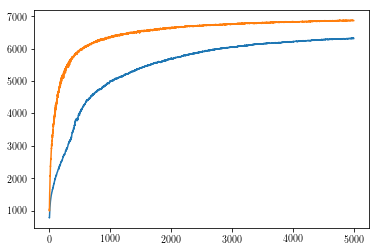

In [118]:
plt.plot(range(len(acc)),acc)
plt.plot(range(len(acc_soft)),acc_soft)

### Correctly Classified

In [110]:
k=0
for j in range(X_train.shape[0]):
    if np.argmax(act_layers(X_train, trained_weights_soft, trained_biases_soft, sample=j)[0][-1])==np.argmax(y_train[j]):
        k=k+1
print(f"correctly classified Train: {k/X_train.shape[0]}")
k=0
for j in range(X_test.shape[0]):
    if np.argmax(act_layers(X_test, trained_weights_soft, trained_biases_soft, sample=j)[0][-1])==np.argmax(y_test[j]):
        k=k+1
print(f"correctly classified Test: {k/X_test.shape[0]}")

correctly classified Train: 0.9817142857142858
correctly classified Test: 0.9013333333333333


# Appendix

# Gradient Cost/Error Function
## Gradient with respect to the n-1 layer weights

$$\frac{\partial E}{\partial w^n_{i,j}} = \sum_{k,l} \frac{\partial{E}}{\partial a^n_k} \frac{\partial{a^n_k}}{\partial z^n_l} \frac{\partial{z^n_l}}{\partial w^n_{i,j}}$$

$$E=\sum_p \frac{1}{2} (a_p-y_p)^2$$

$$\frac{\partial{E}}{\partial a^n_k} = \sum_p \frac{1}{2} \frac{\partial}{\partial a^n_k} (y_p-a^n_p)^2 = $$
$$ = \sum_p \delta_{p,k} (a^n_p-y_p) = a^n_k-y_k$$

$$ a^n_k=\sigma(z^n_k) = \frac{1}{1+e^{-z^n_k}} $$

$$\frac{\partial a^n_k}{\partial z^n_l} = \frac{\partial}{\partial z^n_l} \frac{1}{1+e^{-z^n_k}}$$
$$ \frac{\partial}{\partial z^n_l} (1+e^{z^n_k})^{-1} = - \delta_{k,l} \;(1+e^{-z^n_k})^{-2} \;  \; e^{-z^n_k} \; (-1) =$$
$$ = \delta_{k,l}\;\frac{e^{-z^n_k}}{(1+e^{-z^n_k})^{-2}} = \delta_{k,l}\;\frac{e^{-z^n_k}}{(1+e^{-z^n_k})}  \frac{1}{(1+e^{-z^n_k})} = $$
$$ = \delta_{k,l}\;\frac{1}{1+e^{-z^n_k}}  \frac{(1+e^{-z^n_k})-1}{1+e^{-z^n_k}} = $$
$$ = \delta_{k,l}\;\frac{1}{1+e^{-z^n_k}} \left( \frac{1+e^{-z^n_k}}{1+e^{-z^n_k}}-\frac{1}{1+e^{-z^n_k}} \right)$$
$$ = \delta_{k,l}\;\frac{1}{1+e^{-z^n_k}} \left( 1-\frac{1}{1+e^{-z^n_k}} \right) =$$
$$ = \delta_{k,l}\;\sigma(z^n_k) \left( 1-\sigma(z^n_k) \right) $$

$$ z^n_l = \sum_m w^n_{l,m}a^{n-1}_m+b^n_l $$

$$ \frac{\partial z^n_l}{\partial w^n_{i,j}} =\sum_m \frac{\partial}{\partial w^n_{i,j}} w^n_{l,m}a^{n-1}_m+b^n_l =$$
$$ \sum_m \delta_{i,l} \delta_{j,m} a^{n-1}_m = \delta_{i,l} a^{n-1}_j$$

$$\frac{\partial E}{\partial w^n_{i,j}} = \sum_{k,l} \frac{\partial{E}}{\partial a^n_k} \frac{\partial{a^n_k}}{\partial z^n_l} \frac{\partial{z^n_l}}{\partial w^n_{i,j}} = $$
$$ =\sum_{k,l} (a^n_k-y_k) \delta_{k,l}\;\sigma(z^n_k) \left( 1-\sigma(z^n_k) \right) \delta_{i,l} a^{n-1}_j $$
$$ = \underbrace{(a^n_i-y_i) \; \sigma(z^n_i) \; \left( 1-\sigma(z^n_i) \right)}_{\delta^n_i} \; a^{n-1}_j =$$
$$ = \delta^n_i \; a^{n-1}_j $$

$$\frac{\partial E}{\partial b^n_{i}} = \frac{\partial{E}}{\partial a^n_k} \frac{\partial{a^n_k}}{\partial z^n_l} \frac{\partial{z^n_l}}{\partial b^n_{i}} = \delta^n_i $$

## Gradient with respect to the n-1 layer weights

$$\frac{\partial E}{\partial w^{n-1}_{i,j}} = \sum_{k,l,m,n} \frac{\partial{E}}{\partial a^{n}_k} \frac{\partial{a^{n}_k}}{\partial z^{n}_l} \frac{\partial z^{n}_l}{\partial a^{n-1}_m} \frac{\partial a^{n-1}_m}{\partial z^{n-1}_n} \frac{\partial{z^{n-1}_n}}{\partial w^{n-1}_{i,j}} $$

$$\sum_{k} \frac{\partial{E}}{\partial a^{n}_k} \frac{\partial{a^{n}_k}}{\partial z^{n}_l} = \delta^n_l$$ 

$$\frac{\partial z^{n}_l}{\partial a^{n-1}_m} = \frac{\partial}{\partial a^{n-1}_m} \sum_p \partial w^n_{l,p}a^{n-1}_p+b^n_l =$$
$$ \sum_p w^n_{l,p} \delta_{p,m} = w^n_{l,m}$$

$$\frac{\partial a^{n-1}_m}{\partial z^{n-1}_n} = \delta_{m,n}\;\sigma(z^{n-1}_m) \left( 1-\sigma(z^{n-1}_m) \right)$$

$$ \frac{\partial z^{n-1}_n}{\partial w^{n-1}_{i,j}} =\sum_o \frac{\partial}{\partial w^{n-1}_{i,j}} w^{n-1}_{n,o}a^{n-2}_o+b^{n-1}_n =$$
$$ \sum_o \delta_{i,n} \delta_{j,o} a^{n-2}_o = \delta_{i,n} a^{n-2}_j$$

$$\frac{\partial E}{\partial w^{n-1}_{i,j}} = \sum_{m,n,l}\delta^n_l w^n_{l,m} \delta_{m,n}\;\sigma(z^{n-1}_m) \left( 1-\sigma(z^{n-1}_m) \right) \delta_{i,n} a^{n-2}_j =$$
$$ \sum_{l}\delta^n_l w^n_{l,i} \;\sigma(z^{n-1}_i) \left( 1-\sigma(z^{n-1}_i) \right) a^{n-2}_j $$